Metoda Najmniejszych Kwadratów

Zadanie 1:
Celem zadania jest zastosowanie metody najmniejszych kwadratów do pre-dykcji, czy nowotwór jest złośliwy (ang.malignant) czy łagodny (ang.benign). Nowotwory złośliwe i łagodne mają różne charakterystyki wzrostu. Istotne ce-chy to m. in. promień i tekstura. Charakterystyki te wyznaczane są poprzezdiagnostykę obrazową i biopsje. Do rozwiązania problemu wykorzystamy bibliotekę pandas, typDataFrame oraz dwa zbiory danych:
–breast-cancer-train.dat  –breast-cancer-validate.dat. Nazwy kolumn znajdują się w pliku breast-cancer.labels. Pierwsza ko-lumna to identyfikator pacjentapatient ID. Dla każdego pacjenta wartość wkolumnieMalignant/Benignwskazuje klasę, tj. czy jego nowotwór jest złośliwyczy łagodny. Pozostałe 30 kolumn zawiera cechy, tj. charakterystyki nowotworu.

a):
Otwórz zbiory breast-cancer-train.dat i breast-cancer-validate.dat używając funkcji pd.io.parsers.readcsv z biblioteki pandas.

b): Stwórz histogram i wykres wybranej kolumny danych przy pomocy funkcji historazplot. Pamiętaj o podpisaniu osi i wykresów.

c): Stwórz reprezentacje danych zawartych w obu zbiorach dla liniowej i kwa-dratowej metody najmniejszych kwadratów (łącznie 4 macierze). Dla repre-zentacji kwadratowej użyj tylko podzbioru dostępnych danych, tj. danych zkolumnradius (mean),perimeter (mean),area (mean),symmetry (mean).

d): Stwórz wektorbdla obu zbiorów (tablicę numpy 1D-array o rozmiarze iden-tycznym jak rozmiar kolumnyMalignant/Benignodpowiedniego zbioru da-nych). Elementy wektorabto 1 jeśli nowotwór jest złośliwy, -1 w przeciwnymwypadku. Funkcjanp.whereumożliwi zwięzłe zakodowanie wektorab.

e): Znajdź wagi dla liniowej oraz kwadratowej reprezentacji najmniejszych kwa-dratów przy pomocy macierzyAzbudowanych na podstawie zbiorubreast-cancer-train.dat.  Potrzebny  będzie  także  wektorbzbudowanyna podstawie zbiorubreast-cancer-train.dat.Uwaga. Problem najmniejszych kwadratów należy rozwiązać stosując rów-nanie  normalne  (tj.  nie  używając  funkcjiscipy.linalg.lstsq).  Rozwią-zując  równanie  normalne  należy  użyć  funkcjisolve,  unikając  obliczaniaodwrotności macierzy funkcjąscipy.linalg.pinv.

f): Oblicz współczynniki uwarunkowania macierzy,cond(ATA), dla liniowej ikwadratowej metody najmniejszych kwadratów.

g): Sprawdź  jak  dobrze  otrzymane  wagi  przewidują  typ  nowotworu  (łagodnyczy złośliwy). W tym celu pomnóż liniową reprezentację zbiorubreast-cancer-validate.datoraz wyliczony wektor wag dla reprezentacjiliniowej. Następnie powtórz odpowiednie mnożenie dla reprezentacji kwa-dratowej. Zarówno dla reprezentacji liniowej jak i kwadratowej otrzymamywektorp. Zakładamy, że jeślip[i]>0, toi-ta osoba (prawdopodobnie) manowotwór złośliwy. Jeślip[i]≤0toi-ta osoba (prawdopodobnie) ma nowo-twór łagodny.Porównaj wektorypdla reprezentacji liniowej i kwadratowej z wektoremb(użyj regułp[i]>0orazp[i]≤0).Oblicz liczbę fałszywie dodatnich (ang.false-positives) oraz fałszywie ujem-nych  (ang.false-negatives)  przypadków  dla  obu  reprezentacji.  Przypadekfałszywie dodatni zachodzi, kiedy model przewiduje nowotwór złośliwy, gdyw  rzeczywistości  nowotwór  był  łagodny.  Przypadek  fałszywie  ujemny  za-chodzi,  kiedy  model  przewiduje  nowotwór  łagodny,  gdy  w  rzeczywistościnowotwór był złośliwy.

CODE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# (a)
bc_labels = pd.io.parsers.read_csv('dataset/breast-cancer.labels')
bc_train = pd.io.parsers.read_csv('dataset/breast-cancer-train.dat', header=None)
bc_validate = pd.io.parsers.read_csv('dataset/breast-cancer-validate.dat', header=None)

In [5]:
print(bc_train.shape)

(300, 32)


In [6]:
print(bc_labels)
print(bc_train)
print('===============================================================')
print(bc_validate)

                    patient ID
0             Malignant/Benign
1                radius (mean)
2               texture (mean)
3             perimeter (mean)
4                  area (mean)
5            smoothness (mean)
6           compactness (mean)
7             concavity (mean)
8        concave points (mean)
9              symmetry (mean)
10    fractal dimension (mean)
11             radius (stderr)
12            texture (stderr)
13          perimeter (stderr)
14               area (stderr)
15         smoothness (stderr)
16        compactness (stderr)
17          concavity (stderr)
18     concave points (stderr)
19           symmetry (stderr)
20  fractal dimension (stderr)
21              radius (worst)
22             texture (worst)
23           perimeter (worst)
24                area (worst)
25          smoothness (worst)
26         compactness (worst)
27           concavity (worst)
28      concave points (worst)
29            symmetry (worst)
30   fractal dimension (worst)
        

In [7]:
def find_col_ind(data_frame, name):
    for i in range(data_frame.shape[0]):
        if name == data_frame.iloc[i,0]: return i+1
    return "ERROR - name not found"

In [29]:
def visualize_a():
    radius_m_col = bc_train.iloc[:, 2]
    plt.figure()
    plt.title("Radius (mean) - Histogram")
    plt.xlabel("Radius")
    plt.ylabel("Frequency")
    hist = radius_m_col.hist()

    
    value_counts = radius_m_col.value_counts()

    plt.figure(figsize=(10, 6))
    plt.title("Frequency of Mean Radius Values")
    plt.xlabel("Mean Radius")
    plt.ylabel("Frequency")
    plt.plot(value_counts.index, value_counts.values)
    plt.xticks(rotation=45)
    plt.show()

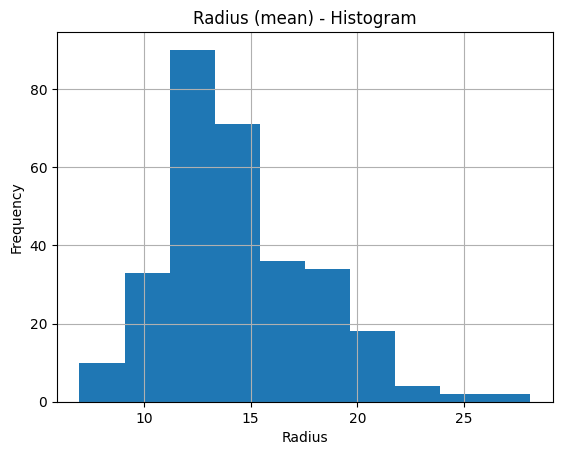

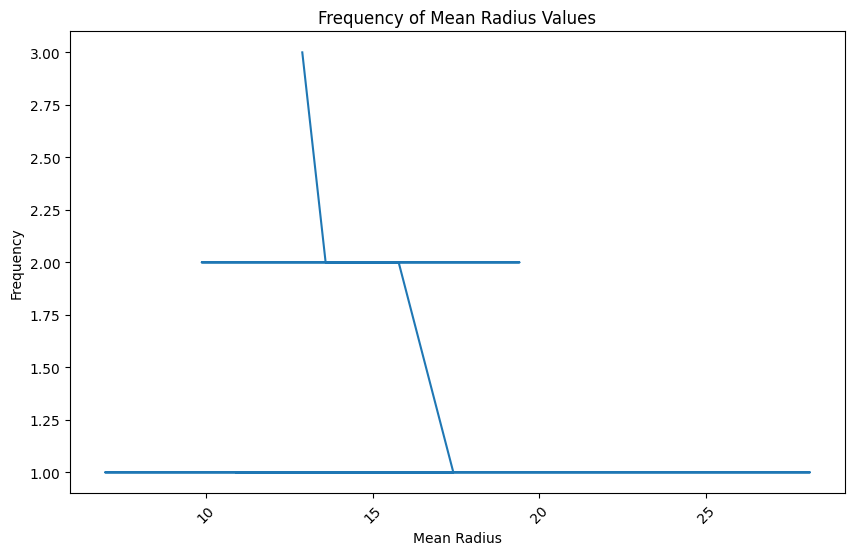

In [30]:
visualize_a()

In [10]:
def create_linear_matrix(data_frame):
    rows, cols = data_frame.shape
    target = [[None for __ in range(cols-2)] for _ in range(rows)]
    for i in range(rows):
        for j in range(cols-2):
            target[i][j] = data_frame.iloc[i, j+2]

    return np.array(target)

In [11]:
#print(len(create_linear_matrix(bc_train)))
#print(len(create_linear_matrix(bc_train)[1]))

In [12]:
def create_quadratic_matrix(data_frame, data_frame_labels, columns_number, columnsT):
    columns = []
    for name in columnsT:
        columns.append(find_col_ind(data_frame_labels, name))

    cols = columns_number
    for i in range(columns_number):
        cols += i+1
        
    rows = data_frame.shape[0]
    target = [[None for __ in range(cols)] for _ in range(rows)]

    for i in range(rows):
        for j in range(columns_number):
            target[i][j] = data_frame.iloc[i, columns[j]]
            target[i][j+columns_number] = data_frame.iloc[i, columns[j]] ** 2

        s = 2*columns_number
        t = 3*columns_number
        id = s
        for k in range(s, t):
            for l in range(k + 1, t):
                target[i][id] = data_frame.iloc[i, columns[k-s]] * data_frame.iloc[i, columns[l-s]]
                id += 1

    
    return np.array(target)
            

In [13]:
def create_b_vector(data_frame):
    b = np.where(data_frame.iloc[:, 1] == 'M', 1, -1)
    return b

Generacja danych:

In [14]:
# tabela z wybranymi kolumnami
columnsT = ["radius (mean)", "perimeter (mean)", "area (mean)", "symmetry (mean)"]

# liniowa reprezentacja breast-cancer-train
train_matrix_lin = create_linear_matrix(bc_train)


# kwadratowa reprezentacja breast-cancer-train
train_matrix_quad = create_quadratic_matrix(bc_train, bc_labels, len(columnsT), columnsT)

# liniowa reprezentacja breast-cancer-validate
validate_matrix_lin = create_linear_matrix(bc_validate)

# kwadratowa reprezentacja breast-cancer-validate
validate_matrix_quad = create_quadratic_matrix(bc_validate, bc_labels, len(columnsT), columnsT)

# zbudowany vector b do breast-cancer-train
b_train = create_b_vector(bc_train)

# zbudowany vector b do breast-cancer-validate
b_validate = create_b_vector(bc_validate)

In [15]:
# Pętla do testowania wyników reprezentacji kwadratowej
for name in columnsT:
    print(find_col_ind(bc_labels, name))
print(bc_train.iloc[:, [2, 4, 5, 10]])
print(train_matrix_quad[0])

2
4
5
10
        2       4       5       10
0    17.99  122.80  1001.0  0.2419
1    20.57  132.90  1326.0  0.1812
2    19.69  130.00  1203.0  0.2069
3    11.42   77.58   386.1  0.2597
4    20.29  135.10  1297.0  0.1809
..     ...     ...     ...     ...
295  13.77   88.06   582.7  0.1592
296  10.91   69.14   363.7  0.1449
297  11.76   75.00   431.1  0.1619
298  14.26   91.22   633.1  0.1635
299  10.51   66.85   334.2  0.1695

[300 rows x 4 columns]
[1.799000e+01 1.228000e+02 1.001000e+03 2.419000e-01 3.236401e+02
 1.507984e+04 1.002001e+06 5.851561e-02 2.209172e+03 1.800799e+04
 4.351781e+00 1.229228e+05 2.970532e+01 2.421419e+02]


Rozwiązania równań:

In [16]:
X = train_matrix_lin
y = b_train

XTX = np.dot(X.T, X)  # X^T * X
XTy = np.dot(X.T, y)  # X^T * y

w_lin = np.linalg.solve(XTX, XTy)


Xq = train_matrix_quad
yq = b_train

XTXq = np.dot(Xq.T, Xq)  # X^T * X
XTyq = np.dot(Xq.T, yq)  # X^T * y

w_quad = np.linalg.solve(XTXq, XTyq)


Współczynnik uwarunkowania cond(A^T A)

In [17]:
cond_A_lin = np.linalg.cond(XTX)
cond_A_lin2 = (np.linalg.norm(XTX) * np.linalg.norm(np.linalg.inv(XTX)))

cond_A_quad = np.linalg.cond(XTXq)
cond_A_quad2 = (np.linalg.norm(XTXq) * np.linalg.norm(np.linalg.inv(XTXq)))

In [18]:
print(cond_A_lin)
print(cond_A_lin2)
print("\n")
print(cond_A_quad)
print(cond_A_quad2)

1809248222560.7683
2078175796646.9785


9.056815200058921e+17
9.25786422297504e+17


In [19]:
p_lin = np.dot(validate_matrix_lin, w_lin)
p_quad = np.dot(validate_matrix_quad, w_quad)

Porównanie wyników

In [20]:
true_counter_lin = 0
false_positive_counter_lin = 0
false_negative_counter_lin = 0

true_counter_quad = 0
false_positive_counter_quad = 0
false_negative_counter_quad = 0


for i in range(len(b_validate)):
    # Liniowa reprezentacja:
    if (p_lin[i] <= 0 and b_validate[i] < 0) or (p_lin[i] > 0 and b_validate[i] > 0):
        true_counter_lin += 1

    if p_lin[i] <= 0 and b_validate[i] > 0:
        false_negative_counter_lin += 1

    if p_lin[i] > 0 and b_validate[i] < 0:
        false_positive_counter_lin += 1


    # Kwadratowa reprezentacja:
    if (p_quad[i] <= 0 and b_validate[i] < 0) or (p_quad[i] > 0 and b_validate[i] > 0):
        true_counter_quad += 1

    if p_quad[i] <= 0 and b_validate[i] > 0:
        false_negative_counter_quad += 1

    if p_quad[i] > 0 and b_validate[i] < 0:
        false_positive_counter_quad += 1

In [21]:
print("Procent poprwanych liniowych przewidywań: ", true_counter_lin/len(b_validate) * 100, "%")
print("Procent poprawnych kwadratowych przewidywań: ", true_counter_quad/len(b_validate) * 100, "%")
print("Liczba fałszywie dodatnich dla liniowych: ", false_positive_counter_lin)
print("Liczba fałszywie ujemnych dla liniowych: ", false_negative_counter_lin)
print("Liczba fałszywie dodatnich dla kwadratowych: ", false_positive_counter_quad)
print("Liczba fałszywie ujemnych dla kwadratowych: ", false_negative_counter_quad)

Procent poprwanych liniowych przewidywań:  96.92307692307692 %
Procent poprawnych kwadratowych przewidywań:  92.3076923076923 %
Liczba fałszywie dodatnich dla liniowych:  6
Liczba fałszywie ujemnych dla liniowych:  2
Liczba fałszywie dodatnich dla kwadratowych:  15
Liczba fałszywie ujemnych dla kwadratowych:  5
